In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor
import yfinance as yf

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
start = "2000-01-01"
stop  = "2021-10-01"
stock = yf.Ticker('AAPL')

df = stock.history(start=start, end=stop)

df['Returns'] = df['Close'].pct_change()
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns
Date,,,,,,,,
1999-12-31,0.772681,0.787513,0.761677,0.787035,163811200,0.0,0.0,NaN
2000-01-03,0.802823,0.861192,0.778422,0.856887,535796800,0.0,0.0,0.088754
2000-01-04,0.828659,0.846839,0.774595,0.784643,512377600,0.0,0.0,-0.084310
2000-01-05,0.794211,0.846361,0.788470,0.796124,778321600,0.0,0.0,0.014633
2000-01-06,0.812392,0.819090,0.727229,0.727229,767972800,0.0,0.0,-0.086538
...,...,...,...,...,...,...,...,...
2021-09-24,145.447729,147.255088,145.347868,146.705887,53477900,0.0,0.0,0.000613
2021-09-27,145.258002,145.747294,143.610413,145.158142,74150700,0.0,0.0,-0.010550
2021-09-28,143.041229,144.539043,141.483505,141.703186,108972300,0.0,0.0,-0.023801


In [4]:
df[['Close','Dividends','Stock Splits', 'Returns']].describe()

,Close,Dividends,Stock Splits,Returns
count,5473.000000,5473.000000,5473.000000,5472.000000
mean,21.629812,0.001036,0.002741,0.001285
std,31.484280,0.012953,0.115469,0.025354
min,0.200869,0.000000,0.000000,-0.518692
25%,1.295693,0.000000,0.000000,-0.010272
50%,9.639235,0.000000,0.000000,0.000903
75%,27.011520,0.000000,0.000000,0.013046
max,156.461655,0.220000,7.000000,0.139049


In [5]:
df[['Close','Returns']].loc[df['Returns']==df['Returns'].min()]

,Close,Returns
Date,,
2000-09-29,0.394235,-0.518692


In [6]:
df[['Close','Returns']].loc[df['Returns']==df['Returns'].max()]

,Close,Returns
Date,,
2008-10-13,3.376181,0.139049


In [7]:
#sns.distplot(df_returns.dropna(),bins=100,color='purple')

In [8]:
# model specification
model1 = LocalOutlierFactor(n_neighbors = 20, metric = "manhattan", contamination = 0.02) # model fitting
y_pred = model1.fit_predict(df[['Close']])
y_pred_ret = model1.fit_predict(df[['Returns']].dropna())

In [9]:
# filter outlier index
outlier_index  = np.where(y_pred == -1) # negative values are outliers and positives inliers# filter outlier values
outlier_index_ret  = np.where(y_pred_ret == -1) # negative values are outliers and positives inliers# filter outlier values
outlier_values = df['Close'].iloc[outlier_index]
outlier_values_ret = df['Returns'].iloc[outlier_index]
outlier_values_ret = outlier_values_ret.to_frame()
outlier_values_ret['Close'] = df['Close'].iloc[outlier_index]
df_outlier     = outlier_values
outlier_values = outlier_values.to_frame()
outlier_values

,Close
Date,
2000-01-12,0.667425
2000-03-21,1.032953
2000-04-03,1.020513
2000-05-23,0.656898
2000-05-24,0.671252
...,...
2021-09-20,142.731689
2021-09-21,143.220963
2021-09-28,141.703186


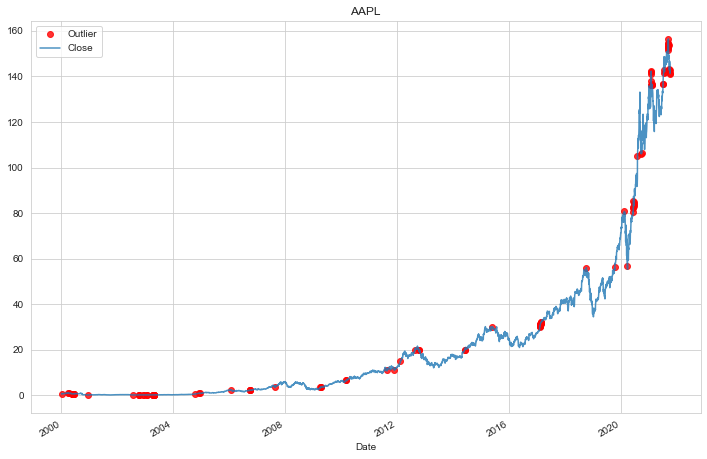

In [15]:
outlier_values_ret['Close'].plot(figsize=(12,8),style='o',color='red', label='Outlier',alpha=.8)
df['Close'].plot(figsize=(12,8), label='Close',alpha=.8)


plt.title('AAPL')
plt.legend()
plt.show()

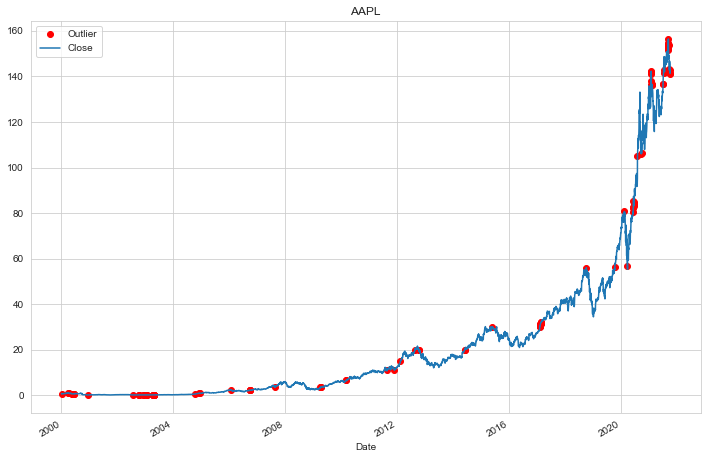

In [11]:
outlier_values['Close'].plot(figsize=(12,8),style='o',color='red', label='Outlier')
df['Close'].plot(figsize=(12,8), label='Close')


plt.title('AAPL')
plt.legend()
plt.show()

In [12]:
#outlier_date = df['Date'].iloc[outlier_index]

In [13]:
import plotly
import cufflinks as cf
cf.go_offline()
df.xs(key='Close',axis=1).iplot()
plt.show()

In [14]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.histogram(df, x=df.index, y="Close", histfunc="avg", title="AAPL")
fig.update_traces(xbins_size="M1")
fig.update_xaxes(showgrid=True, ticklabelmode="period")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(mode="markers", x=outlier_values.index, y=outlier_values["Close"], name="Outliers"))
fig.show()